<a href="https://colab.research.google.com/github/tetsu4746/100knocks-preprocess/blob/master/%E5%B9%B3%E5%8E%9F%E5%93%B2%E5%93%89%E3%80%80%E7%B5%B1%E8%A8%88%E5%AD%A6%E2%91%A1%E3%80%80kada_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:



# ライブラリを読み込む
from google.colab import drive

drive.mount('/content/drive')
# googleドライブをマウントする


Mounted at /content/drive


In [4]:
myfolder = "drive/My Drive/Learn-Statistics/DATA/"

In [5]:
# pandas のインポート
import pandas as pd
#回帰分析メソッド
from sklearn import linear_model
#データ分割用メソッド
from sklearn.model_selection import train_test_split

# 機械学習用ライブラリ sklearn（scikit-learn）の decomposition ライブラリから
# 主成分分析用クラス FactorAnalysis をインポート 
from sklearn.decomposition import PCA

# 機械学習用ライブラリ sklearn（scikit-learn）内にあるライブラリ preprocessing から
# 標準化用クラス StandardScaler をインポート 
from sklearn.preprocessing import StandardScaler

# グラフ描画用ライブラリ matplotlib、seaborn をインポート
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# データーを読み込む
productQuality = pd.read_csv(myfolder + "productQuality.csv")
productQuality.head()

,module1_accuracy,module2_accuracy,module3_accuracy,module4_accuracy,module5_accuracy,module6_accuracy,module7_accuracy,module8_accuracy,module9_accuracy,module10_accuracy,module11_accuracy,machine1_year_from_buy,machine2_year_from_buy,machine3_year_from_buy,machine4_year_from_buy,machine1_month_from_maintenance,machine2_month_from_maintenance,machine3_month_from_maintenance,machine4_month_from_maintenance,average_age,average_skill_score,temperature,humidity,accuracy
0,-0.0628,-1.3199,-0.2871,-0.2214,0.4023,-0.0045,1.6871,0.7589,0.1716,0.5738,0.4259,7,3,0,4,10,8,4,1,39.4,3.0,29.9,80,99.19144
1,-0.2412,-0.9271,0.9078,-0.1451,0.1485,0.2985,-2.0658,-0.9010,-0.0579,1.1854,-0.1901,9,6,0,4,6,10,2,11,49.2,2.8,17.3,20,98.75599
2,0.6312,1.2003,2.5487,1.3827,-0.0203,0.7617,1.3028,0.2420,0.5030,0.9819,0.0170,9,11,2,3,8,12,5,5,43.0,3.1,26.6,70,99.36117
3,0.4498,-0.3274,3.7995,0.5035,0.7337,1.2836,-0.4374,-0.2216,0.5888,0.7855,0.2154,7,10,1,2,4,9,8,2,43.8,2.3,25.0,60,99.00996
4,-0.8805,-1.6132,0.3942,-1.2193,-0.0399,0.1058,6.0260,-0.7853,0.6531,0.8569,0.1422,0,16,1,1,1,3,9,8,43.1,2.8,16.9,10,98.40613


# データの基礎俯瞰・可視化

In [7]:
productQuality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439 entries, 0 to 2438
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   module1_accuracy                 2439 non-null   float64
 1   module2_accuracy                 2439 non-null   float64
 2   module3_accuracy                 2439 non-null   float64
 3   module4_accuracy                 2439 non-null   float64
 4   module5_accuracy                 2439 non-null   float64
 5   module6_accuracy                 2439 non-null   float64
 6   module7_accuracy                 2439 non-null   float64
 7   module8_accuracy                 2439 non-null   float64
 8   module9_accuracy                 2439 non-null   float64
 9   module10_accuracy                2439 non-null   float64
 10  module11_accuracy                2439 non-null   float64
 11  machine1_year_from_buy           2439 non-null   int64  
 12  machine2_year_from_b

In [8]:
# データフレームの形を確認
productQuality.shape

(2439, 24)

In [9]:
# 要約統計量の確認
productQuality.describe()

,module1_accuracy,module2_accuracy,module3_accuracy,module4_accuracy,module5_accuracy,module6_accuracy,module7_accuracy,module8_accuracy,module9_accuracy,module10_accuracy,module11_accuracy,machine1_year_from_buy,machine2_year_from_buy,machine3_year_from_buy,machine4_year_from_buy,machine1_month_from_maintenance,machine2_month_from_maintenance,machine3_month_from_maintenance,machine4_month_from_maintenance,average_age,average_skill_score,temperature,humidity,accuracy
count,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.00000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000
mean,0.003728,0.040659,0.019069,0.015893,-0.002634,0.005222,0.164374,0.007691,0.019176,0.992979,0.00706,4.512505,9.552686,0.963510,1.997950,6.482165,6.532595,6.606806,6.584666,45.091226,3.003198,21.957565,34.079541,99.003001
std,0.396647,1.077579,1.835102,0.798114,0.545336,0.560596,2.610016,0.549883,0.384527,0.404973,0.40496,2.826060,5.756866,0.814086,1.426773,3.477513,3.426909,3.413043,3.406688,5.121639,0.497267,5.137753,25.974909,0.236074
min,-1.349100,-3.485900,-7.052600,-2.418100,-1.880600,-2.322300,-8.414200,-1.894600,-1.217100,-0.746000,-1.32680,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,28.400000,1.200000,4.700000,0.000000,98.199210
25%,-0.246300,-0.670500,-1.258150,-0.562900,-0.362200,-0.380650,-1.554750,-0.375050,-0.243550,0.718300,-0.27160,2.000000,5.000000,0.000000,1.000000,3.000000,4.000000,4.000000,4.000000,41.800000,2.700000,18.600000,20.000000,98.845190
50%,0.004600,0.051600,0.016000,-0.003600,0.010000,0.003500,0.117900,0.009600,0.013100,0.995000,0.00590,5.000000,9.000000,1.000000,2.000000,6.000000,7.000000,7.000000,7.000000,45.100000,3.000000,22.000000,30.000000,99.004130
75%,0.268400,0.758250,1.275950,0.600950,0.377050,0.372500,1.900400,0.379050,0.278300,1.270750,0.28040,7.000000,15.000000,2.000000,3.000000,9.500000,10.000000,10.000000,9.000000,48.400000,3.300000,25.300000,50.000000,99.161620
max,1.430000,3.650600,7.131000,2.545800,1.938700,2.130100,8.319900,1.766100,1.301900,2.323400,1.74470,9.000000,19.000000,2.000000,4.000000,12.000000,12.000000,12.000000,12.000000,64.600000,4.600000,36.900000,130.000000,99.819900


### 標準化



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


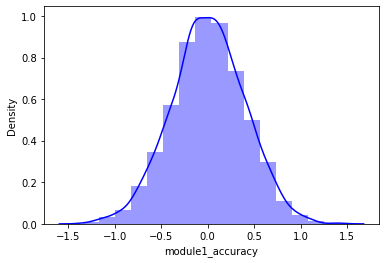

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


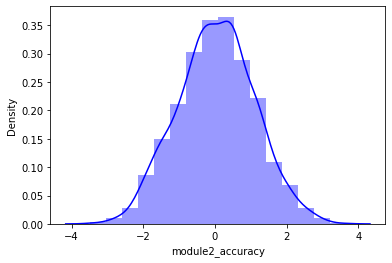

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


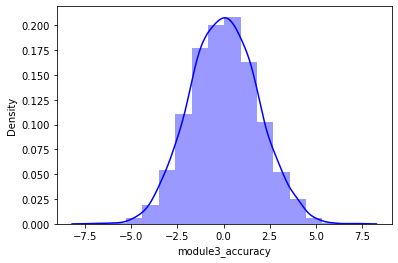

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


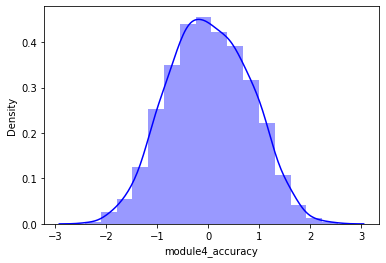

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


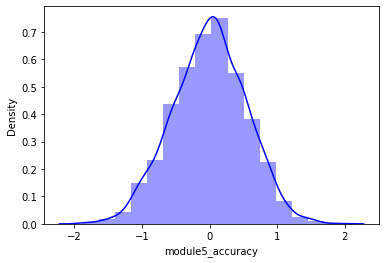

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


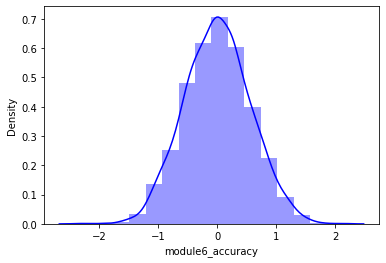

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


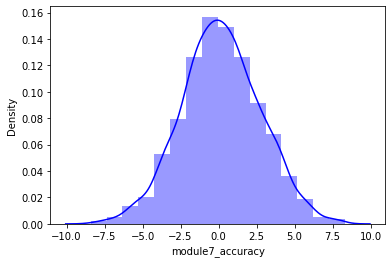

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


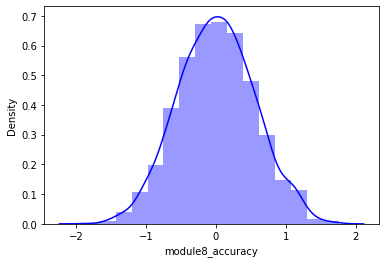

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


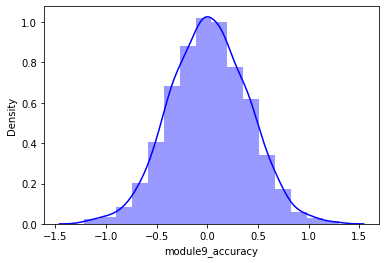

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


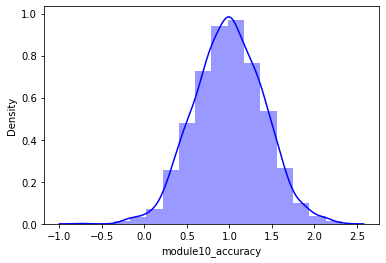

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


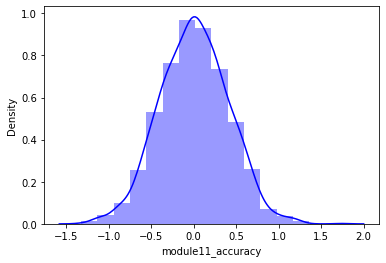

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


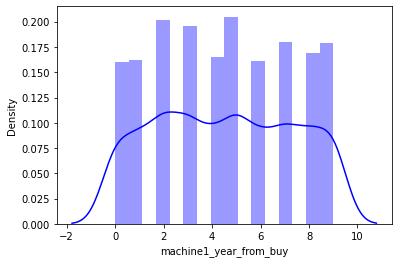

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


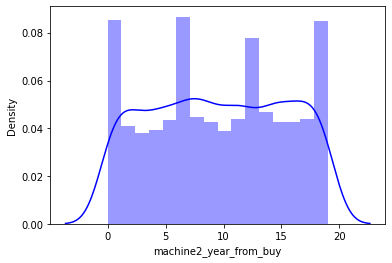

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


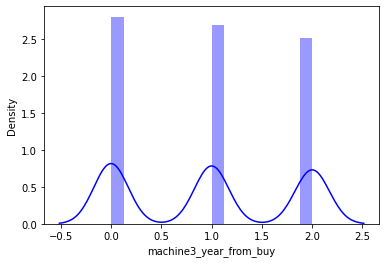

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


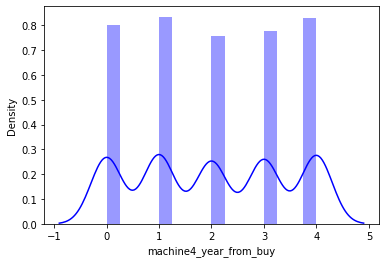

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


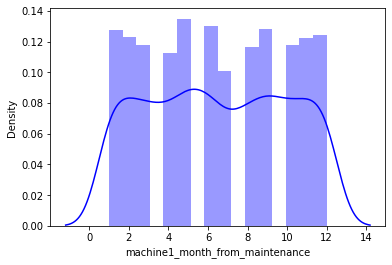

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


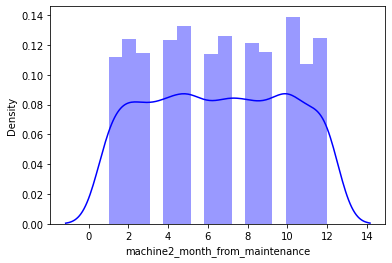

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


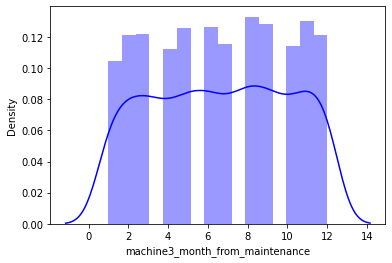

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


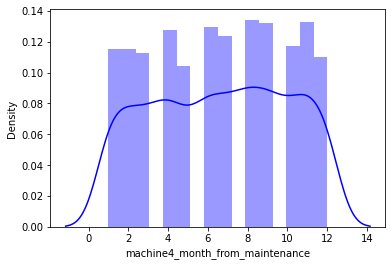

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


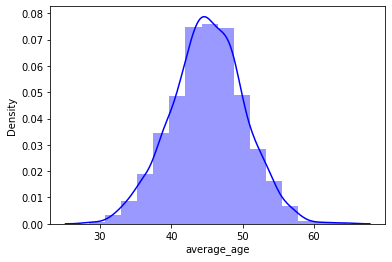

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


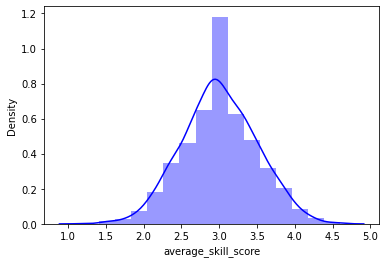

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


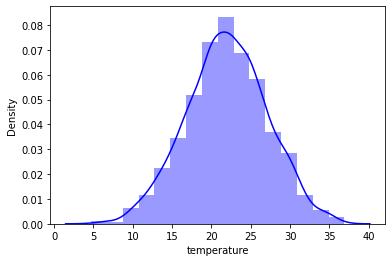

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


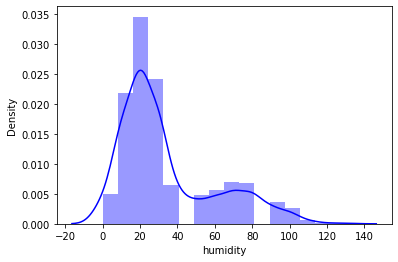

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


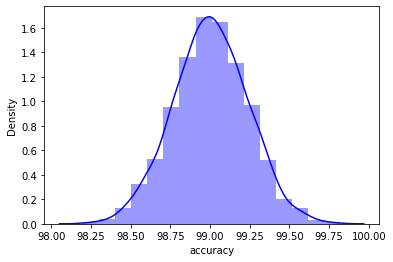

In [10]:
# 全変数についてヒストグラムを作成
for column in productQuality.columns:
  sns.distplot(productQuality.loc[:, column], kde = True, bins = 16, color = 'blue')
  plt.show()

# 部品の寸法精度データはほぼ正規分布に近そう

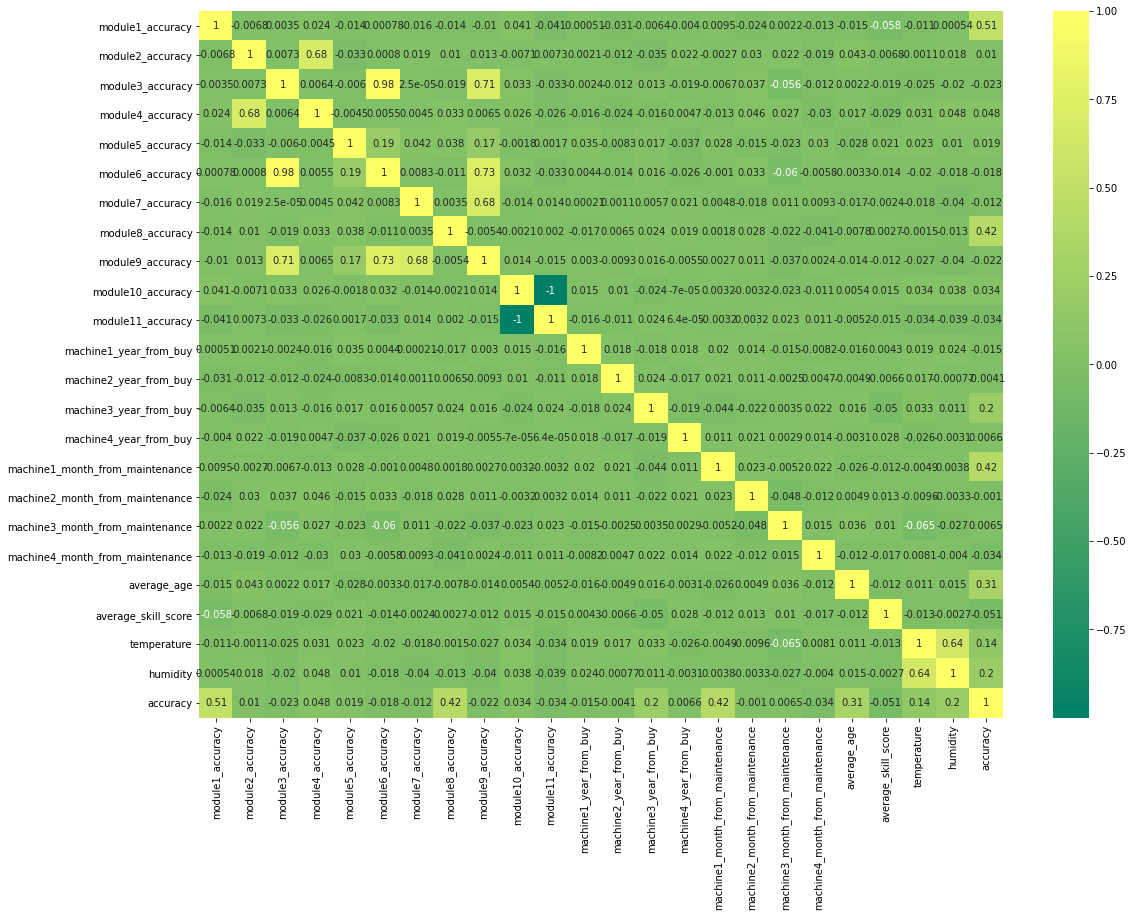

In [11]:
# 総当たりの相関行列をヒートマップにして可視化
plt.figure(figsize=(18, 13))
sns.heatmap(productQuality.corr(method = 'pearson'), annot = True, cmap = 'summer')

# 11種の部品の寸法精度の中には、いくつかの相関係数が高い組合せがある
# 2と4：0.68
# 3と6：0.98
# 3と9：0.71
# 6と9：0.73
# 7と9：0.68
# 10と11：-1（完全に相関）
# 気温と湿度も0.64の相関

In [12]:
# 変数リストを作っておく
# 説明変数（accuracyのぞいたもの）を標準化しておく。
columnList = list (productQuality.columns)
columnList.remove('accuracy')
data_explain = productQuality.loc[:,columnList]
# locスライス表記でラベル指定抽出[インデックスラベル，カラムラベル」
# 登場はｘのみ主成分分析はあくまでも変数圧縮が目的なので目的変数はない
# data_explain のデータを使い標準化パラメータを獲得してから、data_explain に対して標準化を実施
scaler_X = StandardScaler()
scaler_X.fit( data_explain )
data_explain_std = pd.DataFrame(scaler_X.transform(data_explain), columns=columnList)
# data_explain_std＝標準偏差

主成分分析を実施する
 固有値(ExplainedVariance)の確認　新しい変数の分散を教えてくれる　（標準化済みなので分散＝１）
 

In [13]:
# 主成分分析(principalComponentAnalysis)用クラスのインスタンスを生成する
pca_X = PCA()

# 主成分分析を実行する
pca_X.fit(data_explain_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
# 固有値を表示する　固有値はexplained_varianceプロパティに記録されてる
# 『（新たな変数が）説明する分散の量』という名前がついてる
pca_X_explained_variance = pd.DataFrame( pca_X.explained_variance_ , columns=["ExplainedVariance"])
pca_X_explained_variance
# 元の変数は分散１　の情報量がある　最初の変数の2.7個分
# 次の変数は2.0個分の情報量を持っていると解釈できる

,ExplainedVariance
0,2.753797
1,2.025538
2,1.713169
3,1.623595
4,1.280321
5,1.130375
6,1.076932
7,1.072589
8,1.048039
9,1.035157


固有ベクトルは新しい変数が古いヘンスを使ってどのように表現原できるか教えてくれる　新たな変数の解釈にも酢使える

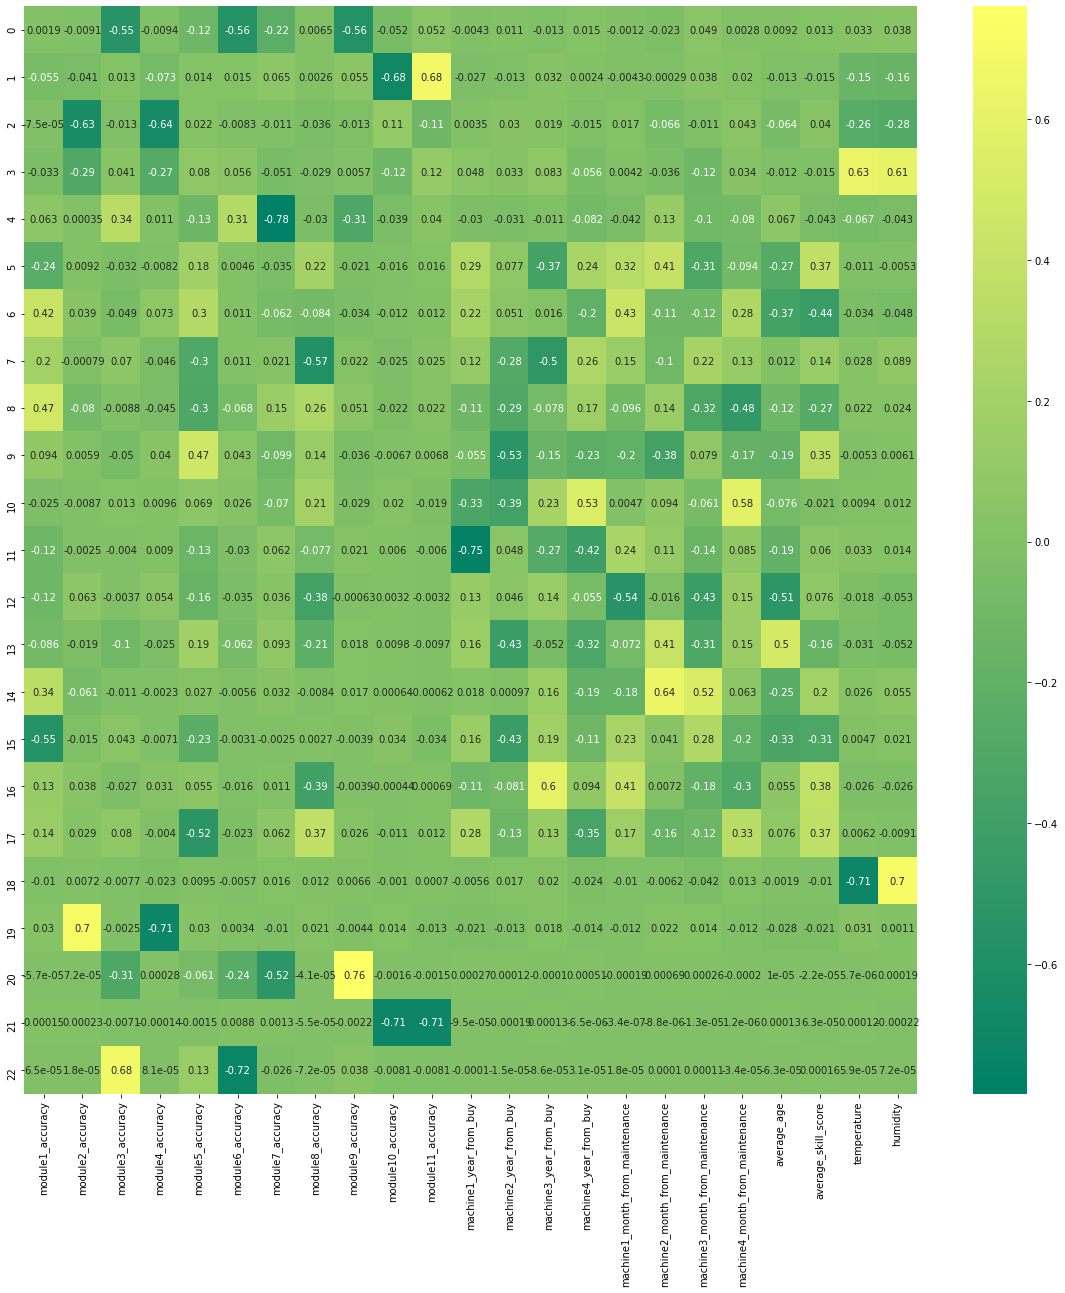

In [15]:
#  固有ベクトルcomponentsが入っている（主成分）を表示する

pca_X_components = pd.DataFrame(pca_X.components_, columns=columnList)
plt.figure(figsize=(20, 20))
sns.heatmap( pca_X_components, annot=True, cmap="summer" )


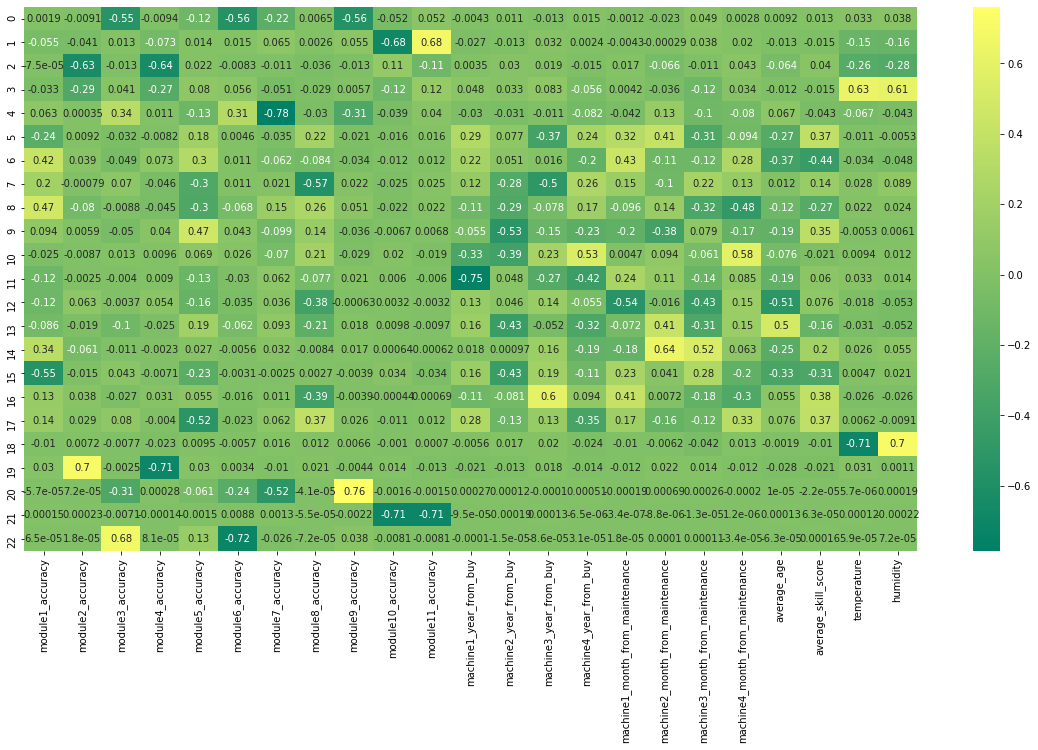

In [16]:
# 固有ベクトルをヒートマップにしておく　components　コンポーネッツ
plt.figure(figsize=(20, 10))
sns.heatmap( pca_X_components, annot=True, cmap="summer" )
# 第一主成分解釈　寄与率一番高い（温度）　第二主成分解釈（マシーン３）

寄与率（ContributionRate）は該当変数が全分散の何%説明しているかを教えてくれている
累積寄与率（CumulativeContributionRate）を折線グラフにすると削れそ主成分の指標がえれる

In [17]:
# 寄与率・累積寄与率を表示する
i = 0
cumCR = 0
CRList = []
for CR in pca_X.explained_variance_ratio_:
  cumCR = cumCR + CR
  CRList.append([CR,cumCR])
  i = i + 1

pca_X_contRate = pd.DataFrame(CRList,columns=["ContributionRate","CumulativeContributionRate"])
pca_X_contRate

,ContributionRate,CumulativeContributionRate
0,1.196812e-01,0.119681
1,8.803075e-02,0.207712
2,7.445506e-02,0.282167
3,7.056213e-02,0.352729
4,5.564332e-02,0.408372
5,4.912661e-02,0.457499
6,4.680393e-02,0.504303
7,4.661518e-02,0.550918
8,4.554822e-02,0.596466
9,4.498838e-02,0.641455


## 累積寄与率（CumulativeContributionRate）を折線グラフにすると削れそ主成分の指標がえれる

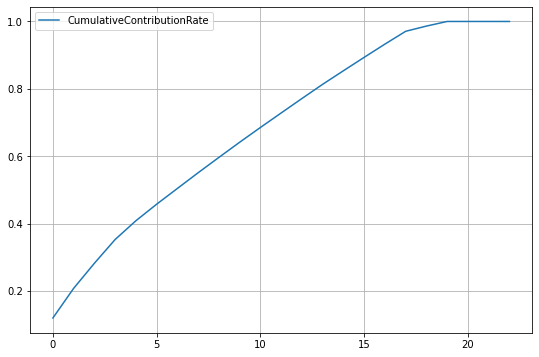

In [18]:
# 累積寄与率を折れ線グラフにして確認する
pca_X_contRate["CumulativeContributionRate"].plot(figsize=(9,6), legend='best', grid=True )

主成分得点かとプロット　各データーが新しい変数系でののような値を持つか(変数変換）を行う

In [19]:
# 主成分得点を計算する
feature = pd.DataFrame( pca_X.transform(data_explain_std) )
feature.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,-0.131691,0.965367,-0.273351,2.598004,-0.838343,2.560228,0.094775,0.334751,2.091122,0.926158,0.141414,-0.590412,-0.909868,-0.400669,-0.378019,0.896607,-0.256334,-0.563245,0.109611,-0.624965,0.011925,-0.000300,-0.000614
1,-0.448686,-0.503268,1.141869,-0.477688,1.184520,1.327736,0.255722,1.672780,-0.622024,-0.975182,0.866816,-1.222425,0.914788,2.012276,-0.884742,-0.313350,-0.448281,-0.719447,0.217615,-0.628590,-0.002000,0.008064,0.004162
2,-2.314439,-0.464698,-2.529092,0.839630,0.252492,0.947897,0.816823,-0.287624,1.110549,-0.894010,0.046028,-1.572081,0.134759,-0.239057,1.480856,-0.303284,1.096286,0.644002,0.291905,-0.365150,-0.013007,0.001845,-0.001824
3,-3.251656,0.501035,-0.904317,1.306715,1.189381,-0.329025,0.872286,-0.045297,0.909199,0.263247,-0.953036,-1.282147,-0.205129,0.041682,1.009407,0.025953,-0.344030,-1.604077,0.222302,-0.538633,-0.017996,-0.002001,0.002972
4,-1.587954,1.365923,2.505221,-0.251243,-2.233420,-1.663623,-1.495558,-0.201249,-1.375996,-0.520859,-0.617041,1.517601,1.466134,-0.270681,-0.493806,0.540851,-0.788806,-1.225684,0.165864,-0.106526,-0.009119,0.000783,0.005109


# 累積寄与率を折れ線グラフにして確認する
１３変数が全分散の何８０%説明しているので１４以降の主成分を削り計算する

In [24]:
# 累積寄与率を折れ線グラフにして確認する　主成分１３でくらいで
feature = feature[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
feature.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.131691,0.965367,-0.273351,2.598004,-0.838343,2.560228,0.094775,0.334751,2.091122,0.926158,0.141414,-0.590412,-0.909868,-0.400669
1,-0.448686,-0.503268,1.141869,-0.477688,1.184520,1.327736,0.255722,1.672780,-0.622024,-0.975182,0.866816,-1.222425,0.914788,2.012276
2,-2.314439,-0.464698,-2.529092,0.839630,0.252492,0.947897,0.816823,-0.287624,1.110549,-0.894010,0.046028,-1.572081,0.134759,-0.239057
3,-3.251656,0.501035,-0.904317,1.306715,1.189381,-0.329025,0.872286,-0.045297,0.909199,0.263247,-0.953036,-1.282147,-0.205129,0.041682
4,-1.587954,1.365923,2.505221,-0.251243,-2.233420,-1.663623,-1.495558,-0.201249,-1.375996,-0.520859,-0.617041,1.517601,1.466134,-0.270681
5,1.981390,2.679469,0.692483,0.482820,1.633214,-1.860452,-0.467748,-0.703867,0.841169,-0.287009,1.102402,-0.289222,-0.747654,-1.166560
6,-0.377376,-1.263874,1.185159,0.448519,0.202936,-0.639337,-0.042689,-0.946073,1.528009,1.146164,0.283373,-0.882620,-0.114724,-0.278756
7,2.341570,0.185559,-1.459093,-0.619788,-0.314651,1.421363,0.482256,1.381655,-1.536352,0.791481,1.481261,0.588382,-0.839663,0.878680
8,-1.376861,0.445416,-0.730557,-0.461142,2.369840,2.042962,0.302259,-0.195135,-0.859508,1.162675,2.280718,0.442600,-0.449960,2.035738
9,1.060127,1.253586,-1.694505,-0.452493,0.573341,1.463721,-0.203821,0.314868,-0.280399,-1.077693,-0.780916,-0.335503,1.040224,-0.660094


In [23]:
# 主成分得点にした後の各変数の相関係数を確認する
# （必ずしもそうでない場合もあるが、基本的には元データよりも相関が薄くなる）
feature = feature[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
feature['accuracy'] = productQuality['accuracy']
# plt.figure(figsize=(20, 10))
# sns.heatmap(feature.corr(),annot=True,cmap="summer")
print(feature['accuracy'])

0       99.19144
1       98.75599
2       99.36117
3       99.00996
4       98.40613
          ...   
2434    99.42865
2435    98.73455
2436    98.85639
2437    98.78491
2438    98.91961
Name: accuracy, Length: 2439, dtype: float64


##  固有ベクトルcomponentsが入っている（主成分）を表示する
# 初めに抜いたaccuracy変数を入れて相関のをみて１３主成分が高いのでその要素を見る
# 新しいセクション

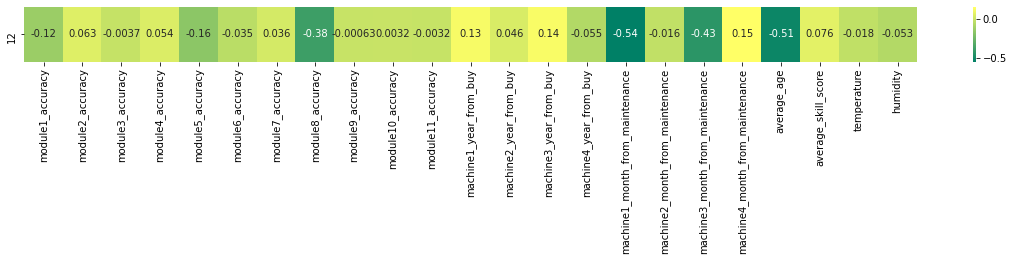

In [22]:
plt.figure(figsize=(20, 1))
sns.heatmap( pca_X_components[12:13], annot=True, cmap="summer" )

もっともaccuracyと相関が高いのは第13主成分  
第13主成分は以下の変数で構成される変数の係数から…  
　・machine1_month_from_maintenance  メンテから期間が経つほど accuracy は上がる  
　・average_age  年齢が高い人がいるほど accuracy は上がる  
　・machine3_month_from_maintenance  メンテから期間が経つほど accuracy は上がる  
　・module8_accuracy  部品の精度が上がるほど accuracy は上がる  
…という事が読み取れる。